In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
y = car_evaluation.data.targets 
  
# metadata 
# car_evaluation.metadata
  
# variable information 
# car_evaluation.variables



In [3]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [4]:
# preprocessing
categorical_cols = X.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

le = LabelEncoder()
y['class'] = le.fit_transform(y['class'])
y = pd.Series(y.values.ravel())
y

/var/folders/vl/05t5ksb558l04dj_v01x4f4r0000gn/T/ipykernel_31791/1767248442.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/var/folders/vl/05t5ksb558l04dj_v01x4f4r0000gn/T/ipykernel_31791/1767248442.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/var/folders/vl/05t5ksb558l04dj_v01x4f4r0000gn/T/ipykernel_31791/1767248442.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

0       2
1       2
2       2
3       2
4       2
       ..
1723    1
1724    3
1725    2
1726    1
1727    3
Length: 1728, dtype: int64

### Decision Tree

plotting graph


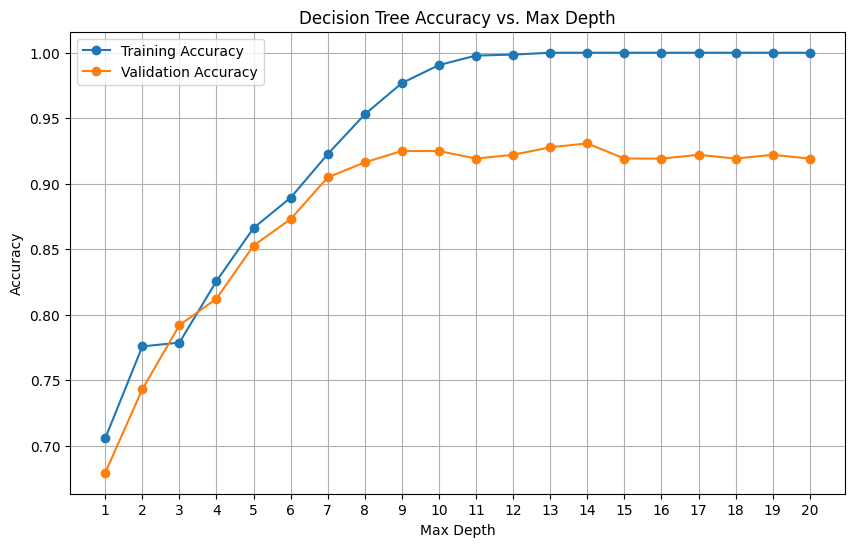

In [5]:
# check max-depth values
max_depth_values = range(1,21)

# training and validation accuracies
train_acc = []
val_acc = []

# iterate over max-depth values
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    clf.fit(X_train, y_train)

    # get training accuracy
    acc = clf.score(X_train, y_train)
    train_acc.append(acc)

    # get validation accuracy
    cv_scores = cross_val_score(clf, X_val, y_val, cv=5)
    acc = np.mean(cv_scores)
    val_acc.append(acc)

print('plotting graph')
plt.figure(figsize=(10,6))
plt.plot(max_depth_values, train_acc, label='Training Accuracy', marker='o', linestyle='-')
plt.plot(max_depth_values, val_acc, label='Validation Accuracy', marker='o', linestyle='-')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depth_values)
plt.legend()
plt.grid(True)
plt.show()


plotting graph


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


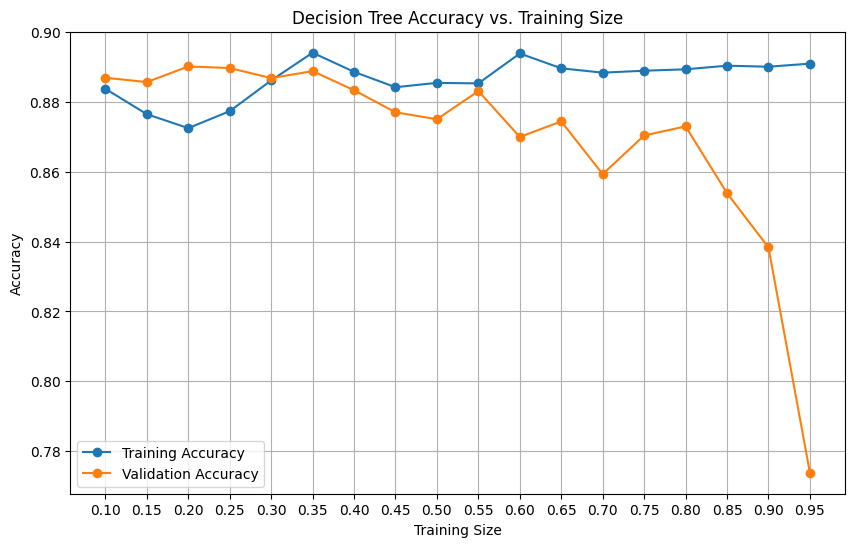

Final Accuracy: 89.01009783916706


In [6]:
# check training size
training_sizes = np.arange(0.1, 1.0, 0.05)

# training and validation accuracies
train_acc = []
val_acc = []

# iterate over max-depth values
for size in training_sizes:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=6)
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=size, random_state=42)
    clf.fit(X_train, y_train)

    # get training accuracy
    acc = clf.score(X_train, y_train)
    train_acc.append(acc)

    # get validation accuracy
    cv_scores = cross_val_score(clf, X_val, y_val, cv=5)
    acc = np.mean(cv_scores)
    val_acc.append(acc)

print('plotting graph')
plt.figure(figsize=(10,6))
plt.plot(training_sizes, train_acc, label='Training Accuracy', marker='o', linestyle='-')
plt.plot(training_sizes, val_acc, label='Validation Accuracy', marker='o', linestyle='-')
plt.title('Decision Tree Accuracy vs. Training Size')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.xticks(training_sizes)
plt.legend()
plt.grid(True)
plt.show()

print(f'Final Accuracy: {max(val_acc) * 100}')

### Neural Network

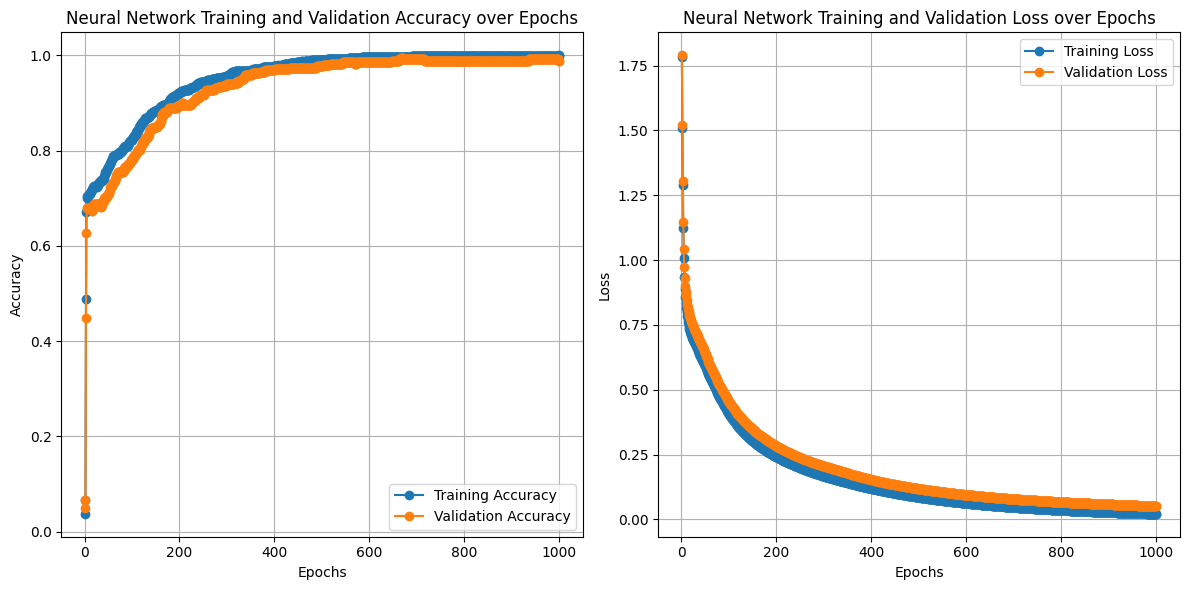

In [7]:
# Initialize empty lists to store training and validation accuracy
train_accuracy = []
val_accuracy = []

# Initialize empty lists to store training and validation loss
train_loss = []
val_loss = []

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)


clf = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', max_iter=1000, random_state=42)

for epoch in range(clf.max_iter):
    clf.partial_fit(X_train, y_train, classes=np.unique(y_train))
    
    # Calculate training and validation accuracy for the current epoch
    train_accuracy.append(clf.score(X_train, y_train))
    val_accuracy.append(clf.score(X_val, y_val))
    
    # Calculate training and validation loss for the current epoch
    train_loss.append(log_loss(y_train, clf.predict_proba(X_train)))
    val_loss.append(log_loss(y_val, clf.predict_proba(X_val)))


plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
epochs = np.arange(1, clf.max_iter + 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o', linestyle='-')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o', linestyle='-')
plt.title('Neural Network Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o', linestyle='-')
plt.title('Neural Network Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterat

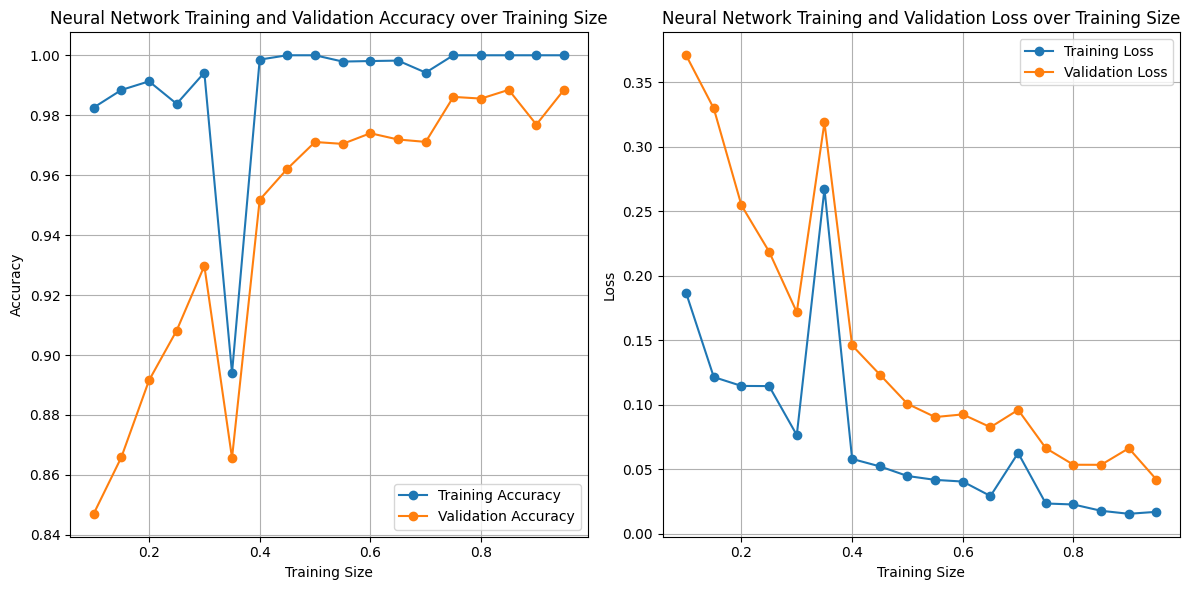

In [8]:
# check training sizes
training_sizes = np.arange(0.1, 1.0, 0.05)

# Initialize empty lists to store training and validation accuracy
train_accuracy = []
val_accuracy = []

# Initialize empty lists to store training and validation loss
train_loss = []
val_loss = []

for size in training_sizes:
    clf = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', max_iter=1000, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=size, random_state=42)
    clf.fit(X_train, y_train)
    
    # Calculate training and validation accuracy for the current epoch
    train_accuracy.append(clf.score(X_train, y_train))
    val_accuracy.append(clf.score(X_val, y_val))
    
    # Calculate training and validation loss for the current epoch
    train_loss.append(log_loss(y_train, clf.predict_proba(X_train)))
    val_loss.append(log_loss(y_val, clf.predict_proba(X_val)))


plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(training_sizes, train_accuracy, label='Training Accuracy', marker='o', linestyle='-')
plt.plot(training_sizes, val_accuracy, label='Validation Accuracy', marker='o', linestyle='-')
plt.title('Neural Network Training and Validation Accuracy over Training Size')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(training_sizes, train_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(training_sizes, val_loss, label='Validation Loss', marker='o', linestyle='-')
plt.title('Neural Network Training and Validation Loss over Training Size')
plt.xlabel('Training Size')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterat

plotting graph


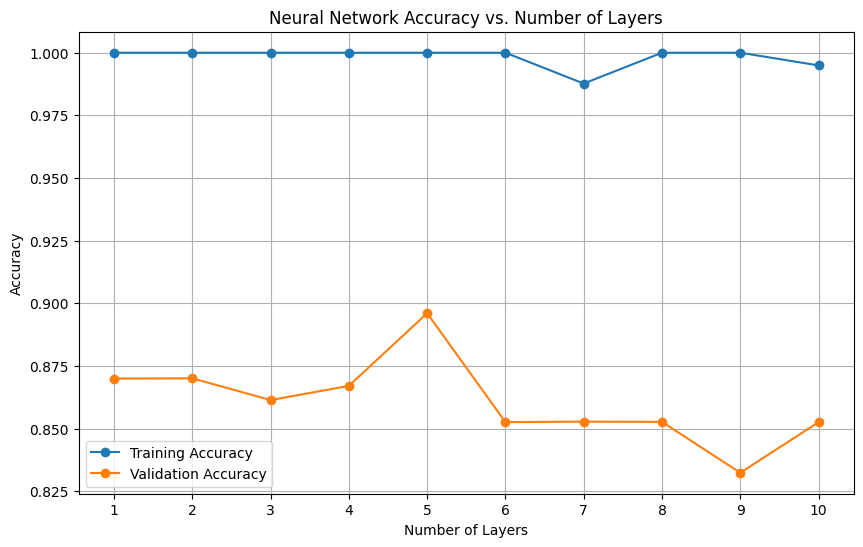

In [9]:
# check number of layers
num_layers = range(1, 11)

# training and validation accuracies
train_acc = []
val_acc = []

# iterate over number of layers
for layers in num_layers:
    hidden_layer_sizes = tuple([64] * layers)
    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation='relu', max_iter=1000, learning_rate_init=0.001, random_state=42)
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)
    clf.fit(X_train, y_train)

    # get training accuracy
    acc = clf.score(X_train, y_train)
    train_acc.append(acc)

    # get validation accuracy
    cv_scores = cross_val_score(clf, X_val, y_val, cv=5)
    acc = np.mean(cv_scores)
    val_acc.append(acc)

print('plotting graph')
plt.figure(figsize=(10,6))
plt.plot(num_layers, train_acc, label='Training Accuracy', marker='o', linestyle='-')
plt.plot(num_layers, val_acc, label='Validation Accuracy', marker='o', linestyle='-')
plt.title('Neural Network Accuracy vs. Number of Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.xticks(num_layers)
plt.legend()
plt.grid(True)
plt.show()

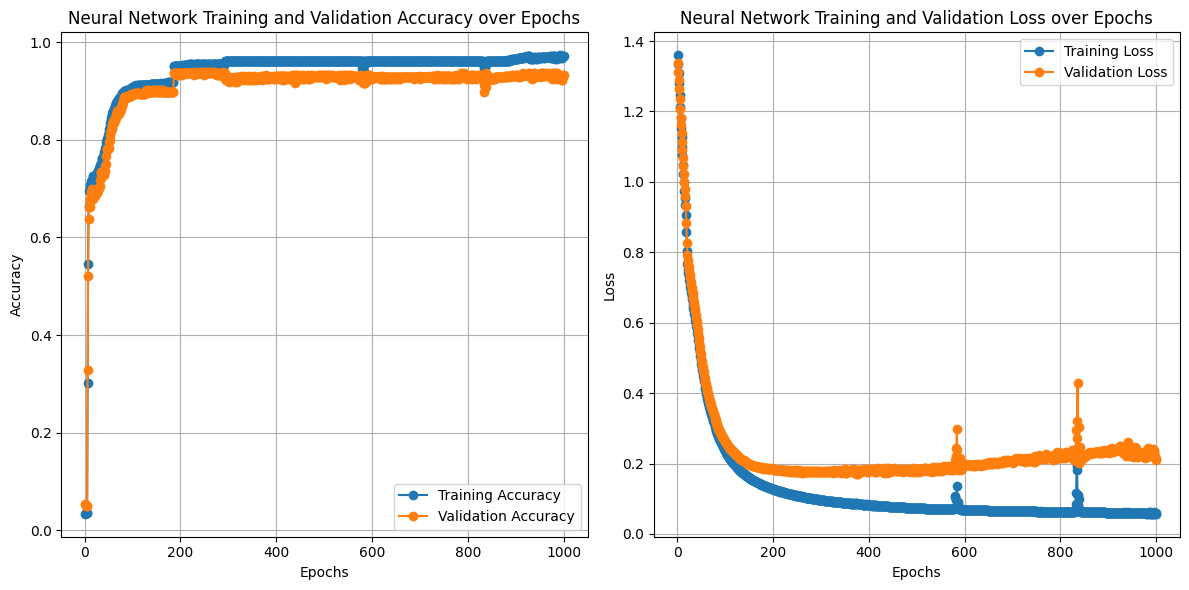

Final Accuracy: 85.25465838509318
Final Loss: 0.21351693783413928


In [10]:
# test on smaller sized layers and with F2 regularization to prevent overfitting
# Initialize empty lists to store training and validation accuracy
train_accuracy = []
val_accuracy = []

# Initialize empty lists to store training and validation loss
train_loss = []
val_loss = []

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)


clf = MLPClassifier(hidden_layer_sizes=(32,16,8,8,4), activation='relu', max_iter=1000, random_state=42,
                    alpha=0.0001,)

for epoch in range(clf.max_iter):
    clf.partial_fit(X_train, y_train, classes=np.unique(y_train))
    
    # Calculate training and validation accuracy for the current epoch
    train_accuracy.append(clf.score(X_train, y_train))
    val_accuracy.append(clf.score(X_val, y_val))
    
    # Calculate training and validation loss for the current epoch
    train_loss.append(log_loss(y_train, clf.predict_proba(X_train)))
    val_loss.append(log_loss(y_val, clf.predict_proba(X_val)))


plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
epochs = np.arange(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o', linestyle='-')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o', linestyle='-')
plt.title('Neural Network Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o', linestyle='-')
plt.title('Neural Network Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f'Final Accuracy: {val_acc[-1] * 100}')
print(f'Final Loss: {val_loss[-1]}')

### Boosting

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


plotting graph


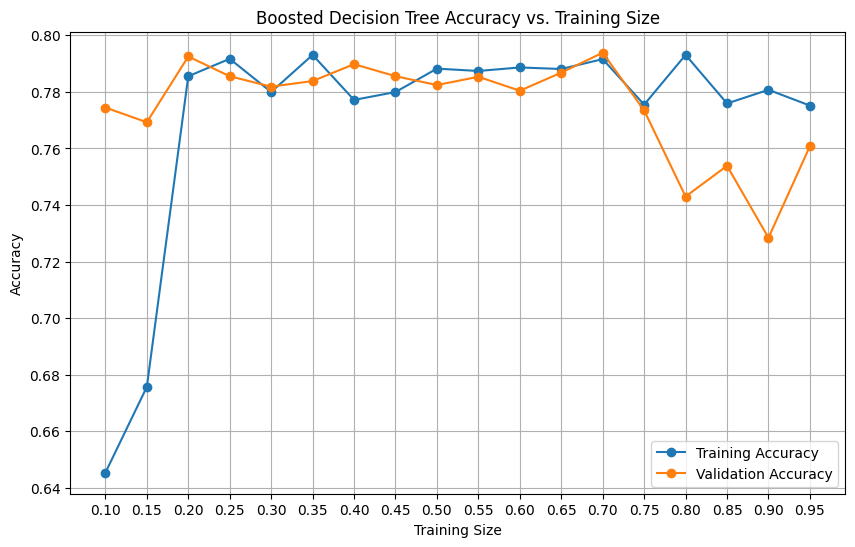

In [11]:
# check training size
training_sizes = np.arange(0.1, 1.0, 0.05)

# training and validation accuracies
train_acc = []
val_acc = []

# iterate over max-depth values
for size in training_sizes:
    base_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    clf = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=size, random_state=42)
    clf.fit(X_train, y_train)

    # get training accuracy
    acc = clf.score(X_train, y_train)
    train_acc.append(acc)

    # get validation accuracy
    cv_scores = cross_val_score(clf, X_val, y_val, cv=5)
    acc = np.mean(cv_scores)
    val_acc.append(acc)

print('plotting graph')
plt.figure(figsize=(10,6))
plt.plot(training_sizes, train_acc, label='Training Accuracy', marker='o', linestyle='-')
plt.plot(training_sizes, val_acc, label='Validation Accuracy', marker='o', linestyle='-')
plt.title('Boosted Decision Tree Accuracy vs. Training Size')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.xticks(training_sizes)
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# check hyperparameters
param_grid = {
    'n_estimators': [50, 100, 150],                   # Number of weak learners (estimators)
    'learning_rate': [0.01, 0.1, 0.5, 1.0],               # Learning rate
}


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

base_classifier = DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(base_classifier)

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

y_pred = best_estimator.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("Best Parameters:", best_params)
print("Accuracy of Best Estimator:", accuracy)

Best Parameters: {'learning_rate': 1.0, 'n_estimators': 150}
Accuracy of Best Estimator: 0.7774566473988439


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


plotting graph


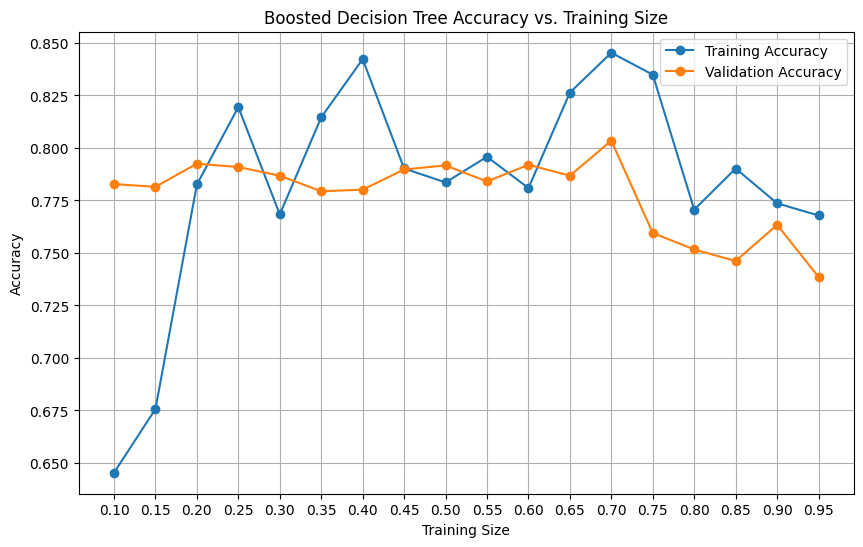

Final Accuracy: 80.34353995519042


In [13]:
# check training size again but with best hyperparameters
training_sizes = np.arange(0.1, 1.0, 0.05)

# training and validation accuracies
train_acc = []
val_acc = []

for size in training_sizes:
    base_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    clf = AdaBoostClassifier(base_classifier, n_estimators=150, random_state=42)
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=size, random_state=42)
    clf.fit(X_train, y_train)

    # get training accuracy
    acc = clf.score(X_train, y_train)
    train_acc.append(acc)

    # get validation accuracy
    cv_scores = cross_val_score(clf, X_val, y_val, cv=5)
    acc = np.mean(cv_scores)
    val_acc.append(acc)

print('plotting graph')
plt.figure(figsize=(10,6))
plt.plot(training_sizes, train_acc, label='Training Accuracy', marker='o', linestyle='-')
plt.plot(training_sizes, val_acc, label='Validation Accuracy', marker='o', linestyle='-')
plt.title('Boosted Decision Tree Accuracy vs. Training Size')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.xticks(training_sizes)
plt.legend()
plt.grid(True)
plt.show()

print(f'Final Accuracy: {max(val_acc) * 100}')



### SVM

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


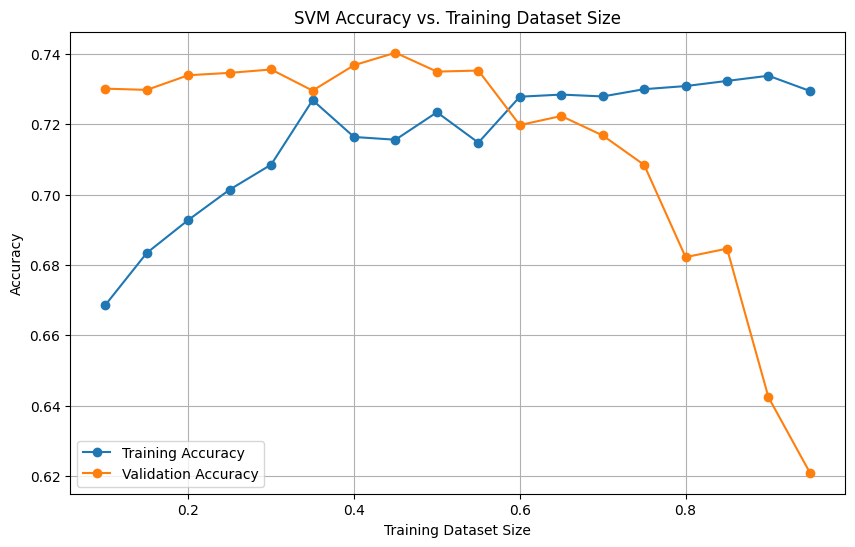

In [14]:
# check training size
training_sizes = np.arange(0.1, 1.0, 0.05)

train_acc = []
val_acc = []

for size in training_sizes:
    clf = SVC(kernel='linear', random_state=42)
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=size, random_state=42)
    clf.fit(X_train, y_train)

    # get training accuracy
    y_train_pred = clf.predict(X_train)
    train_acc.append(accuracy_score(y_train, y_train_pred))

    # get validation accuracy
    cv_scores = cross_val_score(clf, X_val, y_val, cv=5)
    acc = np.mean(cv_scores)
    val_acc.append(acc)

plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_acc, label='Training Accuracy', marker='o')
plt.plot(training_sizes, val_acc, label='Validation Accuracy', marker='o')
plt.xlabel('Training Dataset Size')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy vs. Training Dataset Size')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# find best hyperparameters
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Different kernel functions to test
    'C': [0.01, 0.1, 1, 10],
}

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

# Create an SVM classifier
clf = SVC(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_
train_accuracy = best_estimator.score(X_train, y_train)

# Calculate mean cross-validation accuracy
cross_val_scores = cross_val_score(best_estimator, X_val, y_val, cv=5)
val_accuracy_mean = np.mean(cross_val_scores)

print("Best Hyperparameters:", grid_search.best_params_)
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy_mean)

Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}
Training Accuracy: 0.9971056439942113
Validation Accuracy: 0.9133747412008282


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


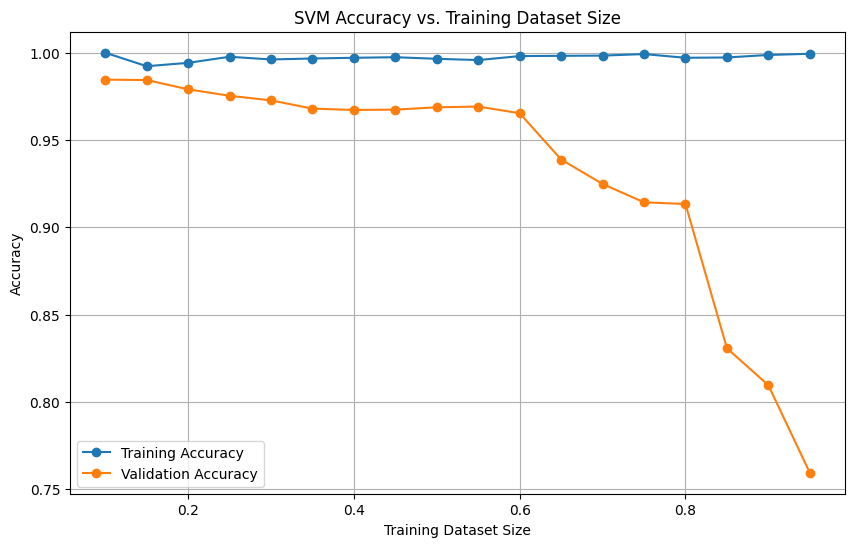

Final Accuracy: 98.45824058042707


In [16]:
# test on training sizes with best hyperparameters
# check training size
training_sizes = np.arange(0.1, 1.0, 0.05)

train_acc = []
val_acc = []

for size in training_sizes:
    clf = SVC(kernel='rbf', C=10, random_state=42)
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=size, random_state=42)
    clf.fit(X_train, y_train)

    # get training accuracy
    y_train_pred = clf.predict(X_train)
    train_acc.append(accuracy_score(y_train, y_train_pred))

    # get validation accuracy
    cv_scores = cross_val_score(clf, X_val, y_val, cv=5)
    acc = np.mean(cv_scores)
    val_acc.append(acc)

plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_acc, label='Training Accuracy', marker='o')
plt.plot(training_sizes, val_acc, label='Validation Accuracy', marker='o')
plt.xlabel('Training Dataset Size')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy vs. Training Dataset Size')
plt.legend()
plt.grid(True)
plt.show()

print(f'Final Accuracy: {max(val_acc) * 100}')

### KNN

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


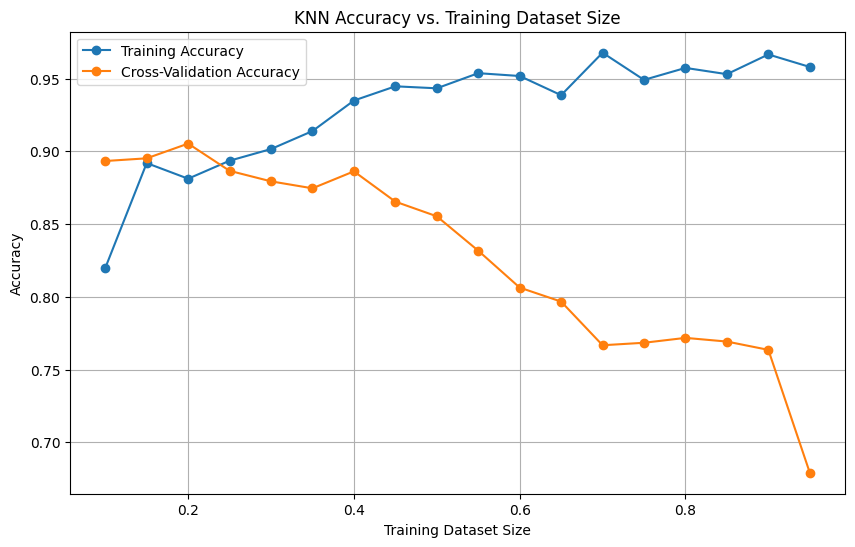

In [17]:
# check training size
training_sizes = np.arange(0.1, 1.0, 0.05)

train_acc = []
val_acc = []

for size in training_sizes:
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=size, random_state=42)

    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train, y_train)

    # get training accuracy
    acc = clf.score(X_train, y_train)
    train_acc.append(acc)

    # get validation accuracy
    cv_scores = cross_val_score(clf, X_val, y_val, cv=5)
    acc = np.mean(cv_scores)
    val_acc.append(acc)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_acc, label='Training Accuracy', marker='o')
plt.plot(training_sizes, val_acc, label='Cross-Validation Accuracy', marker='o')
plt.xlabel('Training Dataset Size')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Training Dataset Size')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Different values of k
    'weights': ['uniform', 'distance'],  # Weighting schemes
}

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

clf = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=8)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_
train_accuracy = best_estimator.score(X_train, y_train)

# Calculate mean cross-validation accuracy
cross_val_scores = cross_val_score(best_estimator, X_val, y_val, cv=8)
val_accuracy_mean = np.mean(cross_val_scores)

print("Best Hyperparameters:", grid_search.best_params_)
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy_mean)

Best Hyperparameters: {'n_neighbors': 7, 'weights': 'distance'}
Training Accuracy: 1.0
Validation Accuracy: 0.7773520084566596


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


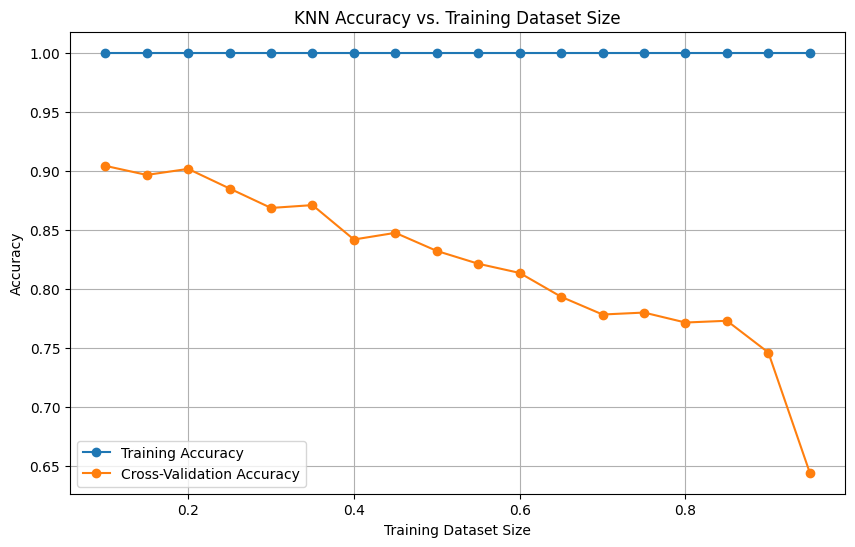

Final Accuracy: 90.42460219309095


In [19]:
# test with best hyperparameters
# check training size
training_sizes = np.arange(0.1, 1.0, 0.05)

train_acc = []
val_acc = []

for size in training_sizes:
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=size, random_state=42)

    clf = KNeighborsClassifier(n_neighbors=7, weights='distance')
    clf.fit(X_train, y_train)

    # get training accuracy
    acc = clf.score(X_train, y_train)
    train_acc.append(acc)

    # get validation accuracy
    cv_scores = cross_val_score(clf, X_val, y_val, cv=5)
    acc = np.mean(cv_scores)
    val_acc.append(acc)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_acc, label='Training Accuracy', marker='o')
plt.plot(training_sizes, val_acc, label='Cross-Validation Accuracy', marker='o')
plt.xlabel('Training Dataset Size')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Training Dataset Size')
plt.legend()
plt.grid(True)
plt.show()

print(f'Final Accuracy: {max(val_acc) * 100}')